In [31]:
# Stock Price Prediction using Recurrent Neural Network  
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [32]:
# Stocks of Tata Consultancy Services (TCS) traded at NSE, Mumbai
df = pd.read_csv('/content/HDFCBANK.NS.csv')

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,0.595425,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,0.594426,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,0.596424,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,0.592428,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,0.591429,189000.0


In [34]:
df.isnull().sum()

Date           0
Open         127
High         127
Low          127
Close        127
Adj Close    127
Volume       127
dtype: int64

In [35]:
df['Close'].replace(' ',np.nan,inplace=True)
df.dropna(subset=['Close'], inplace=True)
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6.102000e+03
mean,280.876740,283.718757,277.699139,280.784199,262.166892,4.844925e+06
std,348.668891,351.470448,345.381472,348.430553,351.118302,5.752826e+06
min,2.435000,2.450000,2.395000,2.435000,0.486530,0.000000e+00
25%,23.590000,23.981250,23.126250,23.520000,9.233752,1.567042e+06
50%,116.000000,119.244999,113.962502,116.799999,82.996315,3.299666e+06
75%,410.987503,415.281250,406.912498,410.612503,389.092781,6.137584e+06
max,1305.000000,1305.500000,1288.800049,1302.400024,1302.400024,2.011300e+08


In [37]:
df_close = df['Close']
print(df_close)

0          2.980000
1          2.975000
2          2.985000
3          2.965000
4          2.960000
           ...     
6224    1112.449951
6225    1096.500000
6226    1090.550049
6227    1078.650024
6228    1057.949951
Name: Close, Length: 6102, dtype: float64


In [38]:
df_close.shape

(6102,)

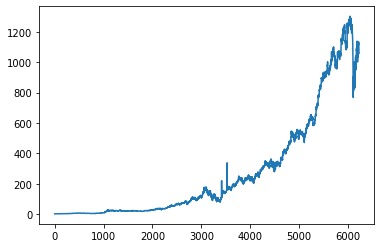

In [39]:
%matplotlib inline
plt.plot(df_close)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [41]:
print(df_close)

[[4.19242049e-04]
 [4.15395791e-04]
 [4.23088306e-04]
 ...
 [8.37034096e-01]
 [8.27879985e-01]
 [8.11956423e-01]]


In [42]:
# splitting the dataset into training data and test data
train_size = int(len(df_close) * 0.75)
test_size = len(df_close) - train_size
train_data, test_data = df_close[:train_size, :], df_close[train_size:len(df_close), :]

In [43]:
train_size, test_size

(4576, 1526)

In [44]:
print(train_data)

[[0.00041924]
 [0.0004154 ]
 [0.00042309]
 ...
 [0.31509693]
 [0.31059683]
 [0.3120584 ]]


In [45]:
print(test_data)

[[0.31411614]
 [0.31478923]
 [0.32117403]
 ...
 [0.8370341 ]
 [0.82787998]
 [0.81195642]]


In [46]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
# reshape into X = t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [48]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (4475, 100)
Shape of y_train: (4475,)


In [49]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (1425, 100)
Shape of y_test: (1425,)


In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
# Stacked LSTM
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
70/70 [==============================] - 21s 213ms/step - loss: 9.9164e-04 - val_loss: 8.6106e-04
Epoch 2/100
70/70 [==============================] - 14s 194ms/step - loss: 3.6944e-05 - val_loss: 9.9757e-04
Epoch 3/100
70/70 [==============================] - 14s 193ms/step - loss: 3.5768e-05 - val_loss: 0.0015
Epoch 4/100
70/70 [==============================] - 15s 211ms/step - loss: 3.6601e-05 - val_loss: 0.0016
Epoch 5/100
70/70 [==============================] - 14s 204ms/step - loss: 3.5030e-05 - val_loss: 0.0026
Epoch 6/100
70/70 [==============================] - 14s 194ms/step - loss: 3.4674e-05 - val_loss: 0.0013
Epoch 7/100
70/70 [==============================] - 14s 195ms/step - loss: 3.6088e-05 - val_loss: 0.0026
Epoch 8/100
70/70 [==============================] - 14s 195ms/step - loss: 3.3060e-05 - val_loss: 0.0019
Epoch 9/100
70/70 [==============================] - 14s 196ms/step - loss: 4.0986e-05 - val_loss: 0.0018
Epoch 10/100
70/70 [==================

In [54]:
# doing prediction and checking performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [55]:
# transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [56]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
# train data RMSE
math.sqrt(mean_squared_error(y_train, train_predict))

154.66214626158217

In [57]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

869.8992884106382

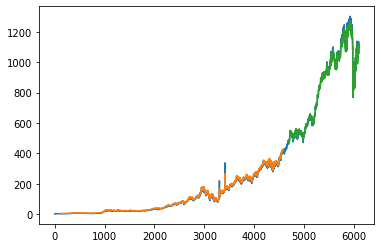

In [58]:
# Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) +1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [59]:
len(test_data)

1526

In [64]:
x_input = test_data[1426:].reshape(1,-1)
x_input.shape

(1, 100)

In [65]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [66]:
print(temp_input)

[0.7197232007989777, 0.7132999695228722, 0.7146077062454873, 0.7497624613014202, 0.7687629817338838, 0.7081459754720292, 0.6992611302748403, 0.7261464782301712, 0.7096844784033204, 0.7127999376081674, 0.7026073556883634, 0.6916455223029138, 0.7117230132493164, 0.6856069167596311, 0.6813375803563158, 0.6417211298755681, 0.6371056210816946, 0.6574522854239498, 0.6593369607457992, 0.6434134461759179, 0.653836840459486, 0.6932609780738224, 0.7252618205826435, 0.7301850484248105, 0.7578781011880515, 0.768147589792385, 0.7844941834373537, 0.7686860750493545, 0.7930328562439845, 0.7796094550925394, 0.7576088354820228, 0.7611089204196927, 0.7432238238434328, 0.754108750544353, 0.728800358862578, 0.759993542718577, 0.7514163704145934, 0.7827249142973864, 0.7930328562439845, 0.78949431796405, 0.7999177130168694, 0.7923790109602209, 0.78949431796405, 0.8108025458691109, 0.825879949982408, 0.818033528877466, 0.8324569938583208, 0.83614943781749, 0.8242644465179088, 0.8466112392882348, 0.8482651484

In [67]:
# demonstrate prediction for next 30 days
lst_output = []
n_steps = 100
i = 0
while(i < 30):
    
    if(len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
    
print(lst_output)

[0.8001309]
101
1 day input [0.71329997 0.71460771 0.74976246 0.76876298 0.70814598 0.69926113
 0.72614648 0.70968448 0.71279994 0.70260736 0.69164552 0.71172301
 0.68560692 0.68133758 0.64172113 0.63710562 0.65745229 0.65933696
 0.64341345 0.65383684 0.69326098 0.72526182 0.73018505 0.7578781
 0.76814759 0.78449418 0.76868608 0.79303286 0.77960946 0.75760884
 0.76110892 0.74322382 0.75410875 0.72880036 0.75999354 0.75141637
 0.78272491 0.79303286 0.78949432 0.79991771 0.79237901 0.78949432
 0.81080255 0.82587995 0.81803353 0.83245699 0.83614944 0.82426445
 0.84661124 0.84826515 0.85226522 0.86349627 0.84822665 0.82911077
 0.81264877 0.80826407 0.81549506 0.84311111 0.86972728 0.87395817
 0.86457324 0.86768875 0.85899617 0.82853383 0.834034   0.81707196
 0.80634094 0.79260982 0.76891684 0.79941768 0.78857125 0.79868684
 0.80111    0.80634094 0.81864897 0.81637962 0.81280268 0.79387901
 0.79257132 0.81084105 0.81861047 0.81276417 0.83326474 0.85741926
 0.8594577  0.85849614 0.85361141 0

In [68]:
# creating an instance of ndarray with evenly spaced values
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [69]:
print(len(df_close))

6102


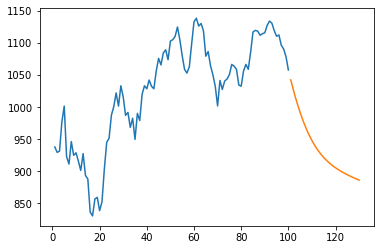

In [71]:
plt.plot(day_new, scaler.inverse_transform(df_close[6002:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

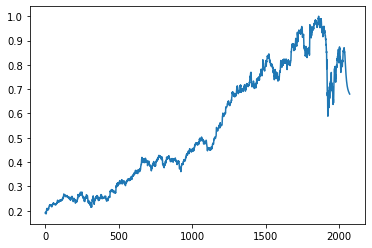

In [72]:
dataset_close = df_close.tolist()
dataset_close.extend(lst_output)
plt.plot(dataset_close[4059:])

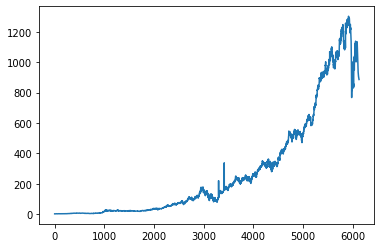

In [73]:
dataset_close = scaler.inverse_transform(dataset_close).tolist()
plt.plot(dataset_close)

In [74]:
# calculating performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# decide on a cutoff limit
cutoff = 0.7  
# initialise a matrix full with zeroes
train_predict_classes = np.zeros_like(train_predict) 
# add a 1 if the cutoff was breached
train_predict_classes[train_predict > cutoff] = 1 
# for the actual values
y_train_classes = np.zeros_like(y_train)
y_train_classes[y_train > cutoff] = 1
# train data
print("Accuracy Score of Train Data:", accuracy_score(y_train_classes, train_predict_classes))
print("Precision Score of Train Data:", precision_score(y_train_classes, train_predict_classes))
print("Recall Score of Train Data:", recall_score(y_train_classes, train_predict_classes))

Accuracy Score of Train Data: 0.0
Precision Score of Train Data: 0.0
Recall Score of Train Data: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# initialise a matrix full with zeroes
test_predict_classes = np.zeros_like(test_predict) 
# add a 1 if the cutoff was breached
test_predict_classes[test_predict > cutoff] = 1 
# for the actual values
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1
# test data
print("Accuracy Score of Test Data:", accuracy_score(y_test_classes, test_predict_classes))
print("Precision Score of Test Data:", precision_score(y_test_classes, test_predict_classes))
print("Recall Score of Test Data:", recall_score(y_test_classes, test_predict_classes))

Accuracy Score of Test Data: 0.47578947368421054
Precision Score of Test Data: 0.47578947368421054
Recall Score of Test Data: 1.0
